# **Dataset Description and Features**

# Dataset Identification

The dataset we have choosen is taken from kaggle:

> https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail?resource=download

Our aim to develop a text summarizer with will take the highlights of an article and generate its highlights

# Features

The initial dataset contains article, which will be used as source text and hightlights, which will be our target or summarized text and an id for each entry which plays no role in summarization of we will eliminate it.


# **Preprocessing with Pandas**

# Import libraries

In [ ]:
!pip install simplet5
from google.colab import files
import pandas as pd
from simplet5 import SimpleT5
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d gowrishankarp/newspaper-text-summarization-cnn-dailymail#fetching dataset from kaggle
!unzip newspaper-text-summarization-cnn-dailymail.zip

training_dataset = pd.read_csv("cnn_dailymail/train.csv")
test_dataset=pd.read_csv("cnn_dailymail/test.csv")
training_dataset

Saving kaggle.json to kaggle (3).json
newspaper-text-summarization-cnn-dailymail.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  newspaper-text-summarization-cnn-dailymail.zip
replace cnn_dailymail/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Missing values

In [ ]:
training_dataset = training_dataset.rename(columns={"highlights":"target_text", "article":"source_text"})
training_dataset = training_dataset[['source_text', 'target_text']]
training_dataset['source_text'] = "summarize: " + training_dataset['source_text']

training_dataset.iloc[0]

test_dataset = test_dataset.rename(columns={"highlights":"target_text", "article":"source_text"})
test_dataset = test_dataset[['source_text', 'target_text']]
test_dataset['source_text'] = "summarize: " + training_dataset['source_text']

def count_words(text):
    return len(text.split())

training_dataset['source_text_length'] = training_dataset['source_text'].apply(lambda x: count_words(x))
training_dataset['target_text_length'] = training_dataset['target_text'].apply(lambda x: count_words(x))
training_dataset['word_frequency']=training_dataset['source_text_length']/training_dataset['target_text_length']

test_dataset['source_text_length'] = test_dataset['source_text'].apply(lambda x: count_words(x))
test_dataset['target_text_length'] = test_dataset['target_text'].apply(lambda x: count_words(x))
test_dataset['word_frequency']=test_dataset['source_text_length']/test_dataset['target_text_length']

In [ ]:
training_dataset.head()

,source_text,target_text,source_text_length,target_text_length,word_frequency
0,summarize: By . Associated Press . PUBLISHED: ...,"Bishop John Folda, of North Dakota, is taking ...",199,37,5.378378
1,summarize: (CNN) -- Ralph Mata was an internal...,Criminal complaint: Cop used his role to help ...,393,38,10.342105
2,summarize: A drunk driver who killed a young w...,"Craig Eccleston-Todd, 27, had drunk at least t...",809,69,11.724638
3,summarize: (CNN) -- With a breezy sweep of his...,Nina dos Santos says Europe must be ready to a...,532,53,10.037736
4,summarize: Fleetwood are the only team still t...,Fleetwood top of League One after 2-0 win at S...,581,67,8.671642


# Outliers


In [ ]:
print("Training Dataset Shape before removing outliers:",training_dataset.shape)
Q1 = training_dataset['word_frequency'].quantile(0.25)
Q3 = training_dataset['word_frequency'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

training_dataset = training_dataset[(training_dataset['word_frequency'] >= lower_bound) & (training_dataset['word_frequency'] <= upper_bound)]
print("Training Dataset Shape before removing outliers:",training_dataset.shape)

print("Test Dataset Shape before removing outliers:",test_dataset.shape)
Q1 = test_dataset['word_frequency'].quantile(0.25)
Q3 = test_dataset['word_frequency'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

test_dataset = test_dataset[(test_dataset['word_frequency'] >= lower_bound) & (test_dataset['word_frequency'] <= upper_bound)]
print("Test Dataset Shape before removing outliers:",test_dataset.shape)

Training Dataset Shape before removing outliers: (287113, 5)
Training Dataset Shape before removing outliers: (275174, 5)
Test Dataset Shape before removing outliers: (11490, 5)
Test Dataset Shape before removing outliers: (11084, 5)


# Data Type Conversion

No Datatype conversion is needed

# Dimensionality

In [ ]:
print("Traing Dataset Shape: ",training_dataset.shape)
print("Test Dataset Shape: ",test_dataset.shape)

Traing Dataset Shape:  (275174, 5)
Test Dataset Shape:  (11084, 5)


# Descriptive Statistics

In [ ]:
training_dataset.describe()

,source_text_length,target_text_length,word_frequency
count,275174.000000,275174.000000,275174.000000
mean,672.743679,52.572431,13.585029
std,319.375419,21.018657,6.313083
min,9.000000,7.000000,0.059211
25%,436.000000,39.000000,8.734694
50%,620.000000,49.000000,12.433962
75%,852.000000,61.000000,17.375000
max,2227.000000,1296.000000,32.333333


# **Preprocessing with Pandas**

# Numerical Features

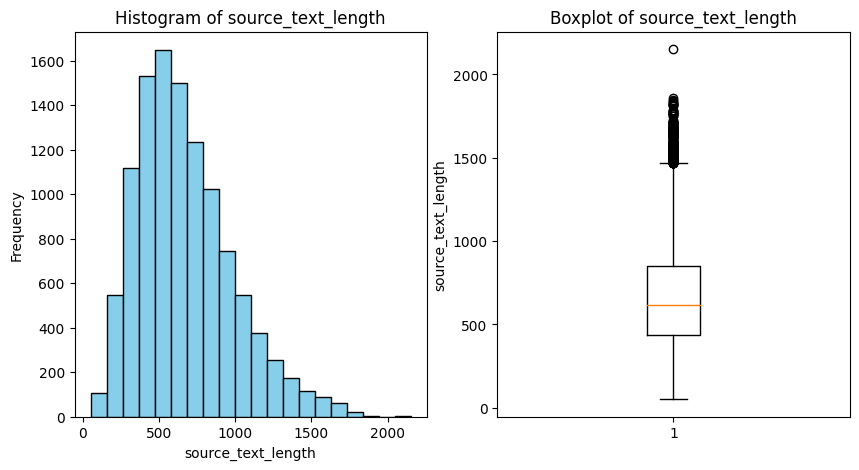

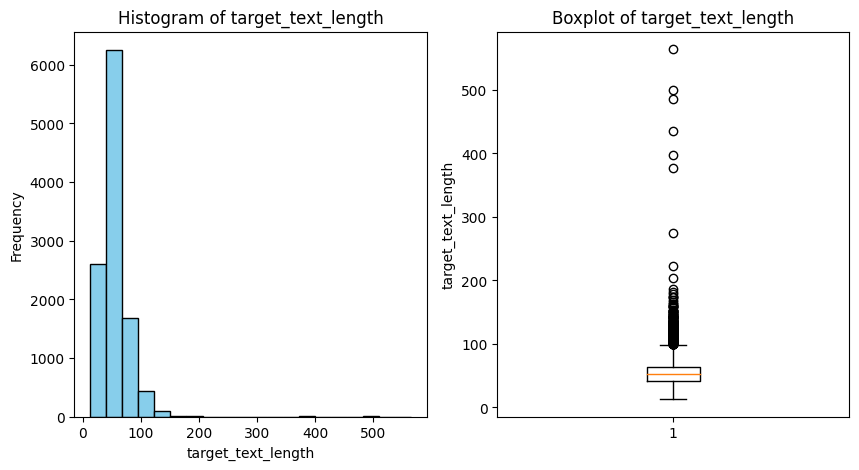

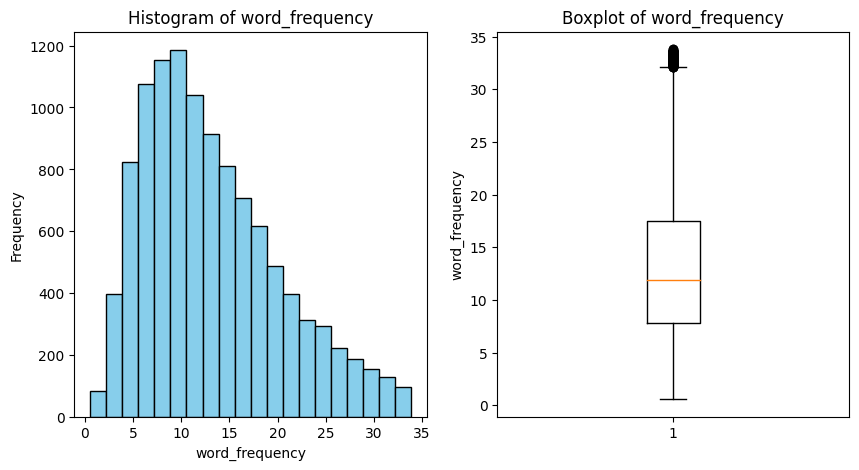

In [ ]:
# Extract numerical features from the dataset
numerical_features = test_dataset.select_dtypes(include=['int', 'float'])

# Visualize the distribution of numerical features
for column in numerical_features.columns:
    # Create a figure with subplots for histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Histogram
    axes[0].hist(test_dataset[column], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    axes[1].boxplot(test_dataset[column])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_ylabel(column)

    # Show the plots
    plt.show()

There are outliers as a lot of the values are above the maximum range. The histogram is skewed towards the left side meaning the dataset includes more of low text length words

# Categorical Features

Our dataset has no categorical features

# Scatter Plots

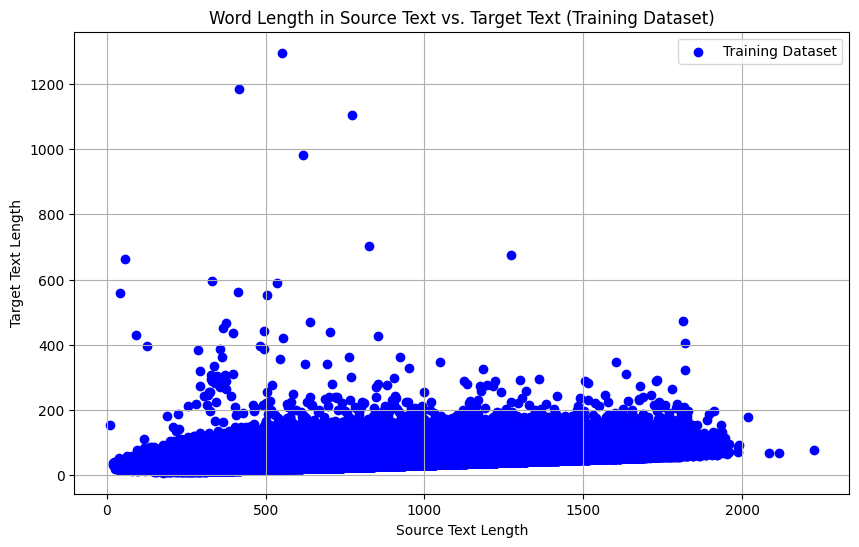

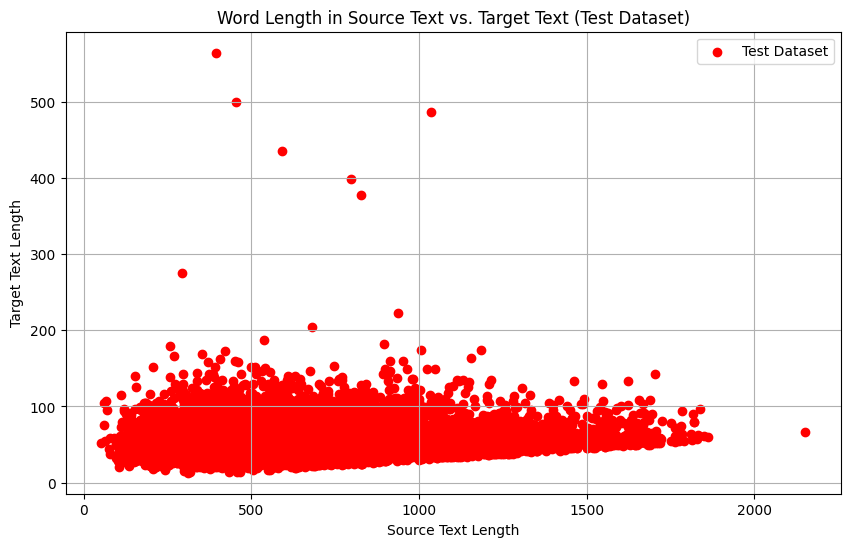

In [ ]:
# Scatter plot for training dataset
plt.figure(figsize=(10, 6))
plt.scatter(training_dataset['source_text_length'], training_dataset['target_text_length'], color='blue', label='Training Dataset')
plt.title('Word Length in Source Text vs. Target Text (Training Dataset)')
plt.xlabel('Source Text Length')
plt.ylabel('Target Text Length')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for test dataset
plt.figure(figsize=(10, 6))
plt.scatter(test_dataset['source_text_length'], test_dataset['target_text_length'], color='red', label='Test Dataset')
plt.title('Word Length in Source Text vs. Target Text (Test Dataset)')
plt.xlabel('Source Text Length')
plt.ylabel('Target Text Length')
plt.legend()
plt.grid(True)
plt.show()


It has a linear trend similar in both graphs with a strong correlation at smaller values of target text length

# Pair Plots

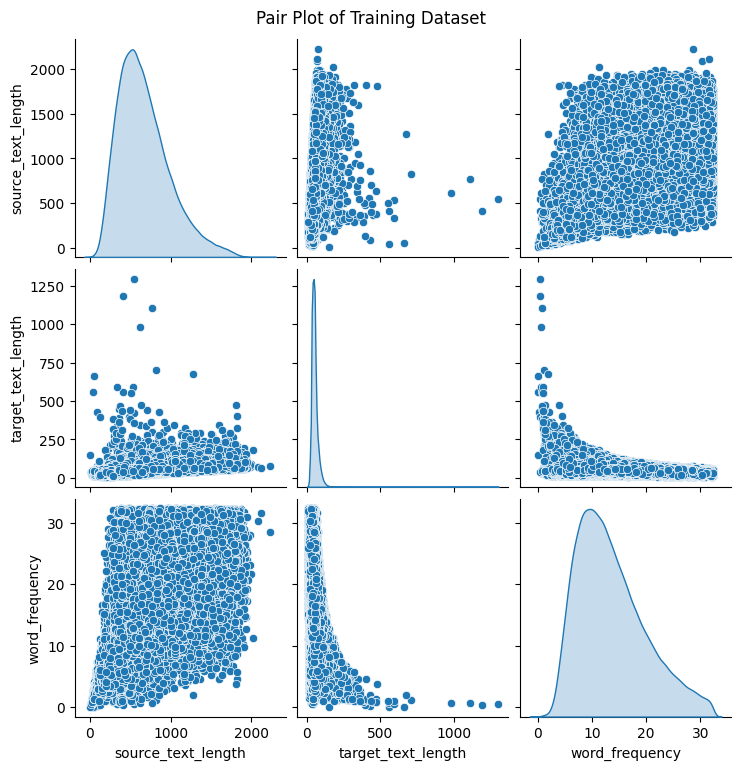

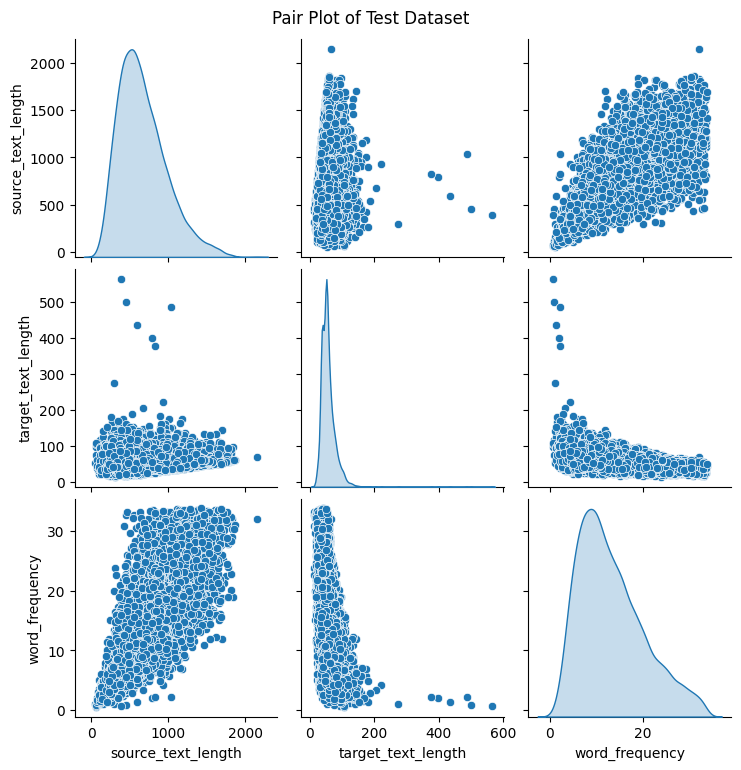

In [ ]:
# Pair plot for training dataset
sns.pairplot(training_dataset[['source_text_length', 'target_text_length', 'word_frequency']], diag_kind='kde')
plt.suptitle('Pair Plot of Training Dataset', y=1.02)
plt.show()

# Pair plot for test dataset
sns.pairplot(test_dataset[['source_text_length', 'target_text_length', 'word_frequency']], diag_kind='kde')
plt.suptitle('Pair Plot of Test Dataset', y=1.02)
plt.show()

# **Methodology**
Since the project involves generating summaries from text data, a sequence-to-sequence model with attention mechanism, such as the T5 model, would be a suitable choice.
Use the SimpleT5 library, which provides an easy-to-use interface for training and deploying T5-based models for various text generation tasks, including text summarization
